<a href="https://colab.research.google.com/github/Kyawhtin21501/CCC_project/blob/main/data_tra/sale_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import files
uploaded = files.upload()  # 📤 ファイル選択画面が出る


Saving kaggle (1).json to kaggle (1).json


In [192]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "Balaji Fast Food Sales.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rajatsurana979/fast-food-sales-report",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-822512009.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fast-food-sales-report' dataset.
First 5 records:    order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  


In [193]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [195]:
from dateutil import parser

df['date'] = df['date'].apply(lambda x: parser.parse(x))



In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [197]:
from pydoc import replace
df = df.sort_values(by='date')



In [198]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
622,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Mr.,Midnight
571,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon
519,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Mrs.,Night
412,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Mrs.,Midnight
393,394,2022-04-03,Sandwich,Fastfood,60,1,60,Cash,Mrs.,Morning
604,605,2022-04-04,Cold coffee,Beverages,40,15,600,NaN,Mrs.,Afternoon
509,510,2022-04-04,Sandwich,Fastfood,60,14,840,Online,Mr.,Afternoon
333,334,2022-04-04,Cold coffee,Beverages,40,4,160,Cash,Mrs.,Evening
905,906,2022-04-04,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon


In [199]:
df.drop(columns=["order_id","item_name","item_type","item_price","quantity","transaction_type"],inplace=True)

In [200]:
df.head()
df.reset_index(drop=True,inplace=True)

In [201]:
df.head()
df.isnull().sum()


,0
date,0
transaction_amount,0
received_by,0
time_of_sale,0


In [202]:
df.drop(columns= ["received_by","time_of_sale"],axis=1,inplace=True)


In [203]:
df.head()

,date,transaction_amount
0,2022-04-01,420
1,2022-04-02,600
2,2022-04-02,900
3,2022-04-03,220
4,2022-04-03,200


In [204]:
grouped_df = df.groupby('date')['transaction_amount'].mean()
grouped_df = pd.DataFrame(grouped_df)




print(grouped_df.head())


            transaction_amount
date                          
2022-04-01               420.0
2022-04-02               750.0
2022-04-03               160.0
2022-04-04               625.0
2022-04-05               100.0


In [205]:
display(grouped_df)

            transaction_amount
date                          
2022-04-01          420.000000
2022-04-02          750.000000
2022-04-03          160.000000
2022-04-04          625.000000
2022-04-05          100.000000
...                        ...
2023-03-25          280.000000
2023-03-26           93.333333
2023-03-27          260.000000
2023-03-29          540.000000
2023-03-30          350.000000

[348 rows x 1 columns]


In [206]:
df = grouped_df

In [213]:
df['transaction_amount'] = df["transaction_amount"] * 1.5

In [214]:
df.head()

,transaction_amount
date,
2022-04-01,152460.0
2022-04-02,272250.0
2022-04-03,58080.0
2022-04-04,226875.0
2022-04-05,36300.0


from matplotlib import pyplot as plt
_df_0['transaction_amount'].plot(kind='hist', bins=20, title='transaction_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['transaction_amount'].plot(kind='line', figsize=(8, 4), title='transaction_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='date', ylabel='transaction_amount'>

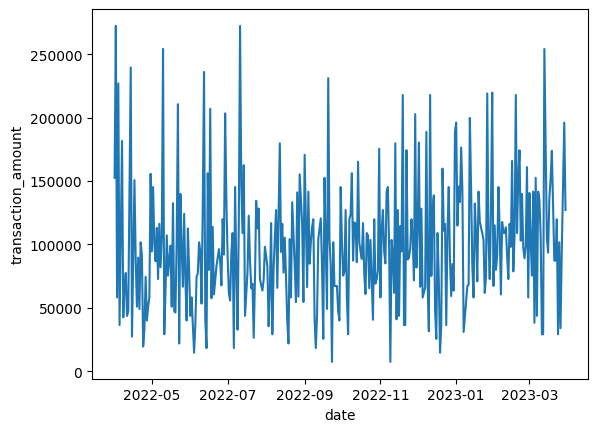

In [215]:
sns.lineplot(data=df,x="date",y="transaction_amount")